In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
! pip install streamlit
import streamlit as st

In [5]:
data = pd.read_csv("C:/Users/Lapcom Store/Desktop/sales_data.csv")
data.head()

,SalesID,Product,SalesRep,Region,SalesAmount,Discount,Quantity,CustomerAge,Satisfaction,FollowUp
0,1,Product 31,Rep 24,North,10041.32406,NaN,9,56.598272,3,No
1,2,Product 79,Rep 44,West,NaN,NaN,14,NaN,2,Yes
2,3,Product 51,Rep 43,North,11332.63728,NaN,8,37.767032,1,Yes
3,4,Product 14,Rep 7,East,12309.61882,NaN,5,47.739142,3,Yes
4,5,Product 67,Rep 2,North,10909.59035,NaN,7,28.416635,4,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalesID       5100 non-null   int64  
 1   Product       5100 non-null   object 
 2   SalesRep      5100 non-null   object 
 3   Region        4980 non-null   object 
 4   SalesAmount   4592 non-null   float64
 5   Discount      1532 non-null   float64
 6   Quantity      5100 non-null   int64  
 7   CustomerAge   4592 non-null   float64
 8   Satisfaction  5100 non-null   int64  
 9   FollowUp      5100 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 398.6+ KB


In [9]:
data.set_index('SalesID',inplace=True)

In [11]:
data.head()

,Product,SalesRep,Region,SalesAmount,Discount,Quantity,CustomerAge,Satisfaction,FollowUp
SalesID,,,,,,,,,
1,Product 31,Rep 24,North,10041.32406,NaN,9,56.598272,3,No
2,Product 79,Rep 44,West,NaN,NaN,14,NaN,2,Yes
3,Product 51,Rep 43,North,11332.63728,NaN,8,37.767032,1,Yes
4,Product 14,Rep 7,East,12309.61882,NaN,5,47.739142,3,Yes
5,Product 67,Rep 2,North,10909.59035,NaN,7,28.416635,4,No


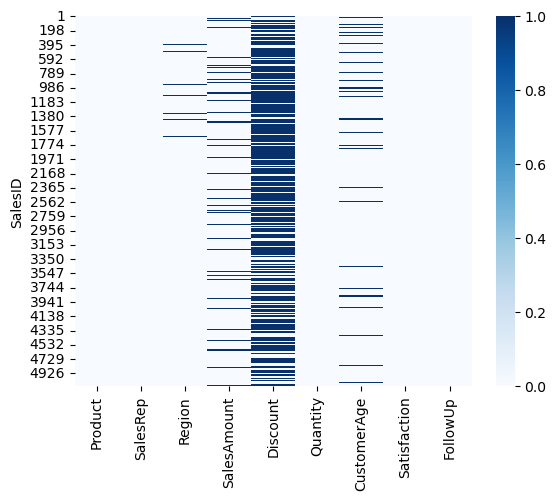

In [13]:
sns.heatmap(data.isnull(), cmap='Blues')
plt.show()

In [15]:
missing_values = data.isna().sum()
sorted_missing_values = missing_values.sort_values(ascending=False)
print(sorted_missing_values)

Discount        3568
SalesAmount      508
CustomerAge      508
Region           120
Product            0
SalesRep           0
Quantity           0
Satisfaction       0
FollowUp           0
dtype: int64


In [17]:
data = data.drop(columns=['Discount'])

In [19]:
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
numeric_df = pd.DataFrame(numeric_cols)
non_numeric_df = pd.DataFrame(non_numeric_cols)

In [21]:
imputer = IterativeImputer()
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [23]:
missing_values = data.isna().sum()
sorted_missing_values = missing_values.sort_values(ascending=False)
print(sorted_missing_values)

Region          120
Product           0
SalesRep          0
SalesAmount       0
Quantity          0
CustomerAge       0
Satisfaction      0
FollowUp          0
dtype: int64


In [27]:
# Encode non-numeric columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Initialize the Iterative Imputer
imputer = IterativeImputer()

# Impute all columns
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to a DataFrame
data = pd.DataFrame(data_imputed, columns=data.columns)

# Decode non-numeric columns back to original labels
for column in label_encoders:
    data[column] = label_encoders[column].inverse_transform(data[column].astype(int))

In [29]:
missing_values = data.isna().sum()
sorted_missing_values = missing_values.sort_values(ascending=False)
print(sorted_missing_values)

Product         0
SalesRep        0
Region          0
SalesAmount     0
Quantity        0
CustomerAge     0
Satisfaction    0
FollowUp        0
dtype: int64


In [31]:
data.duplicated().sum()

97

In [33]:
data = data.drop_duplicates()

In [35]:
data.duplicated().sum()

0

In [37]:
Q1 = data['SalesAmount'].quantile(0.25)
Q3 = data['SalesAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['SalesAmount'] < lower_bound) | (data['SalesAmount'] > upper_bound)]

In [39]:
# Removing outliers based on IQR method
data = data[(data['SalesAmount'] >= lower_bound) & (data['SalesAmount'] <= upper_bound)]

In [41]:
data.describe()

,SalesAmount,Quantity,CustomerAge,Satisfaction
count,4826.000000,4826.000000,4826.000000,4826.000000
mean,9983.057233,10.060298,35.256103,2.957315
std,905.086497,4.669190,9.404075,1.421027
min,7579.284220,1.000000,2.660437,1.000000
25%,9406.950735,8.000000,29.637993,2.000000
50%,10040.825617,10.000000,35.227687,3.000000
75%,10544.994033,12.000000,41.119766,4.000000
max,12382.668990,160.000000,70.852556,5.000000


In [43]:
data.describe(include = "O")

,Product,SalesRep,Region,FollowUp
count,4826,4826,4826,4826
unique,100,50,5,2
top,Product 74,Rep 19,South,Yes
freq,70,119,1210,2442


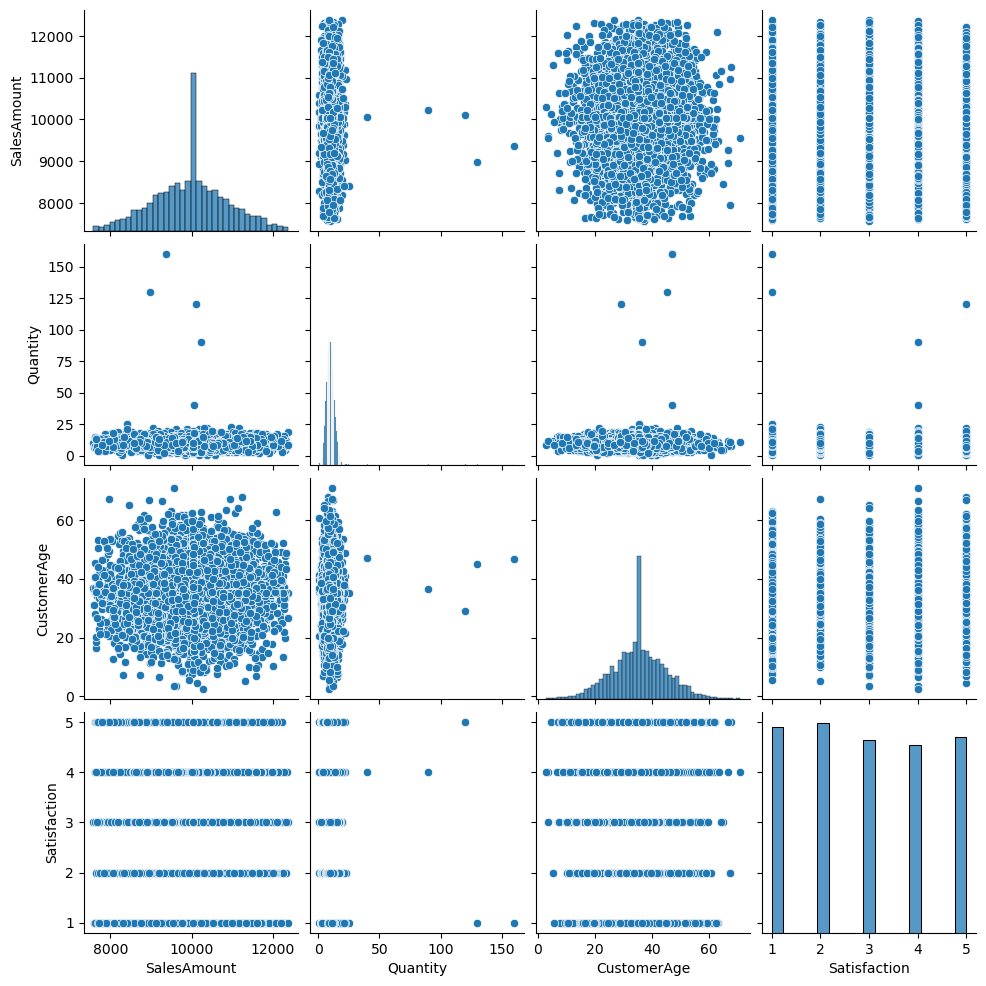

In [45]:
sns.pairplot(data)
plt.show()

## What is the relationship between SalesAmount and Quantity?🙄


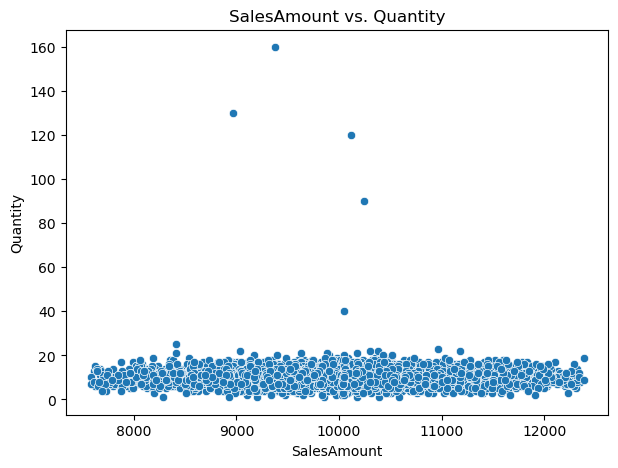

In [47]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='SalesAmount', y='Quantity', data=data)
plt.title('SalesAmount vs. Quantity')
plt.xlabel('SalesAmount')
plt.ylabel('Quantity')
plt.show()

## From the plot, we can say that when the quantity is 20 or less, there is increase in sales amount✅

# What is the distribution of the SalesAmount across the dataset?🙄


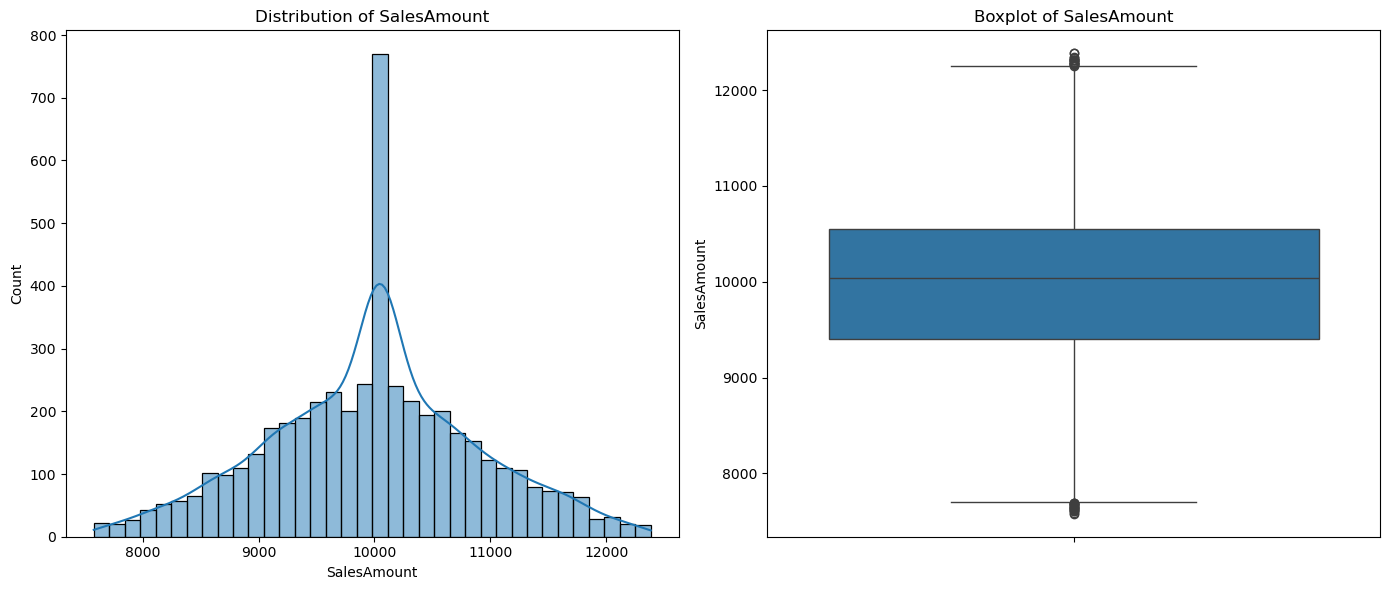

In [49]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['SalesAmount'], kde=True)
plt.title('Distribution of SalesAmount')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['SalesAmount'])
plt.title('Boxplot of SalesAmount')

plt.tight_layout()
plt.show()

## The distribution of sales amount seems to be normal✅

# How does Sales Amount vary with Quantity?🙄


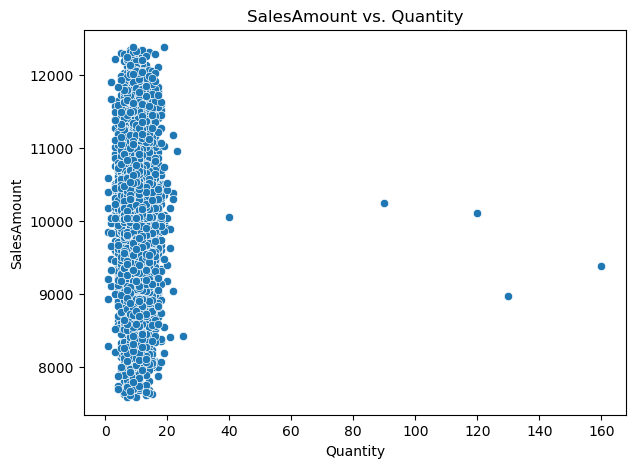

In [51]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Quantity', y='SalesAmount', data=data)
plt.title('SalesAmount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('SalesAmount')
plt.show()

# Are there any patterns in SalesAmount over time or age groups?🙄


C:\Windows\Temp\ipykernel_10108\313040126.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeGroup')['SalesAmount'].sum().plot(kind='line')


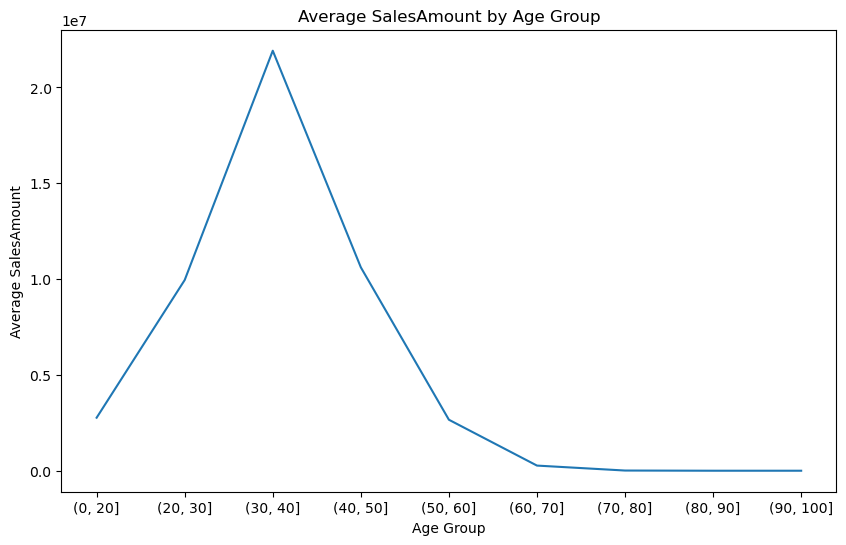

In [53]:
# Example with age groups
age_groups = pd.cut(data['CustomerAge'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['AgeGroup'] = age_groups

plt.figure(figsize=(10, 6))
data.groupby('AgeGroup')['SalesAmount'].sum().plot(kind='line')
plt.title('Average SalesAmount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average SalesAmount')
plt.show()

## We can conclude that the people in the age group {0,20} have the most sales amount, and people in the age group {70,80} and above this have the least sales amount✅

# What is the average SalesAmount by CustomerAge groups?🙄


C:\Windows\Temp\ipykernel_10108\3504540304.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = data.groupby(age_bins)['SalesAmount'].mean()


Text(0, 0.5, 'Average SalesAmount')

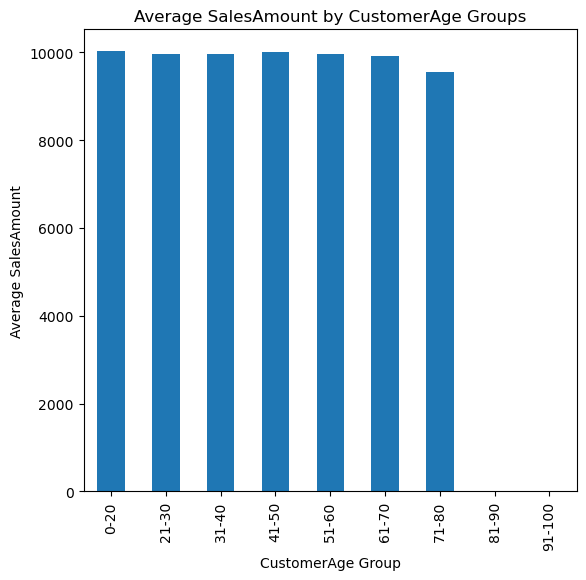

In [55]:
# Bin CustomerAge
age_bins = pd.cut(data['CustomerAge'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
age_sales = data.groupby(age_bins)['SalesAmount'].mean()

plt.figure(figsize=(14, 6))

# Bar Plot
plt.subplot(1, 2, 1)
age_sales.plot(kind='bar')
plt.title('Average SalesAmount by CustomerAge Groups')
plt.xlabel('CustomerAge Group')
plt.ylabel('Average SalesAmount')

# What are the relationships between SalesAmount, CustomerAge, and Quantity?🙄


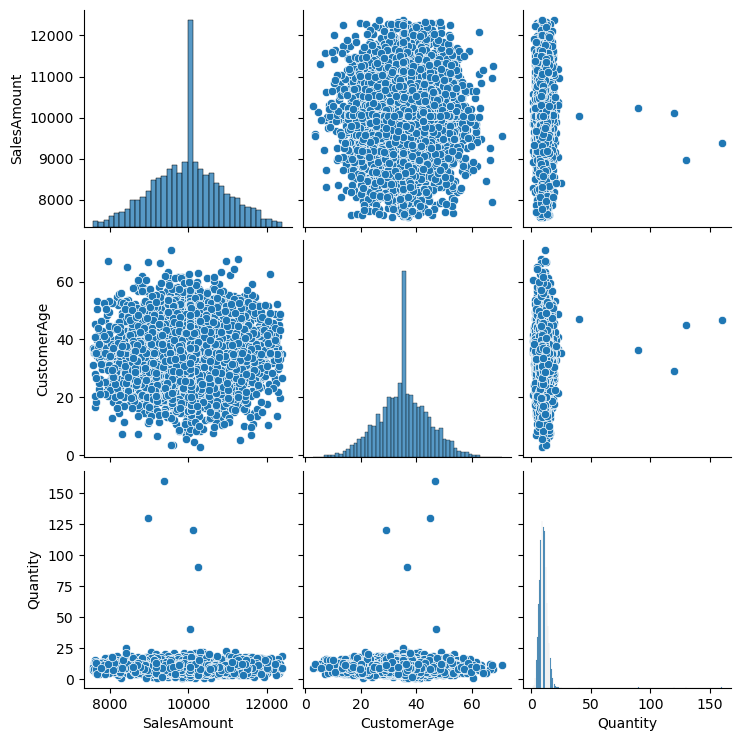

In [57]:
sns.pairplot(data[['SalesAmount', 'CustomerAge', 'Quantity']])
plt.show()

# What are the basic statistics (mean, median, standard deviation) for numeric columns?🙄


In [59]:
# Summary statistics for numeric columns
print(data[['SalesAmount', 'CustomerAge', 'Quantity']].describe())

        SalesAmount  CustomerAge     Quantity
count   4826.000000  4826.000000  4826.000000
mean    9983.057233    35.256103    10.060298
std      905.086497     9.404075     4.669190
min     7579.284220     2.660437     1.000000
25%     9406.950735    29.637993     8.000000
50%    10040.825617    35.227687    10.000000
75%    10544.994033    41.119766    12.000000
max    12382.668990    70.852556   160.000000


# What are the top sales representatives based on total Sales Amount?🙄


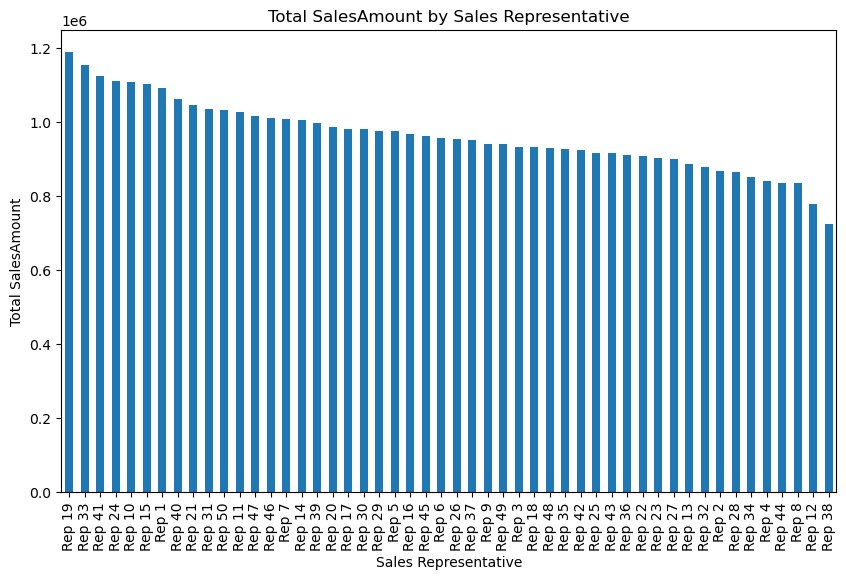

In [61]:
plt.figure(figsize=(10, 6))
data.groupby('SalesRep')['SalesAmount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total SalesAmount by Sales Representative')
plt.xlabel('Sales Representative')
plt.ylabel('Total SalesAmount')
plt.show()

## We see that Rep 19 has the highest total sales amount✅

# How do Sales Amount and Quantity vary by Region?🙄


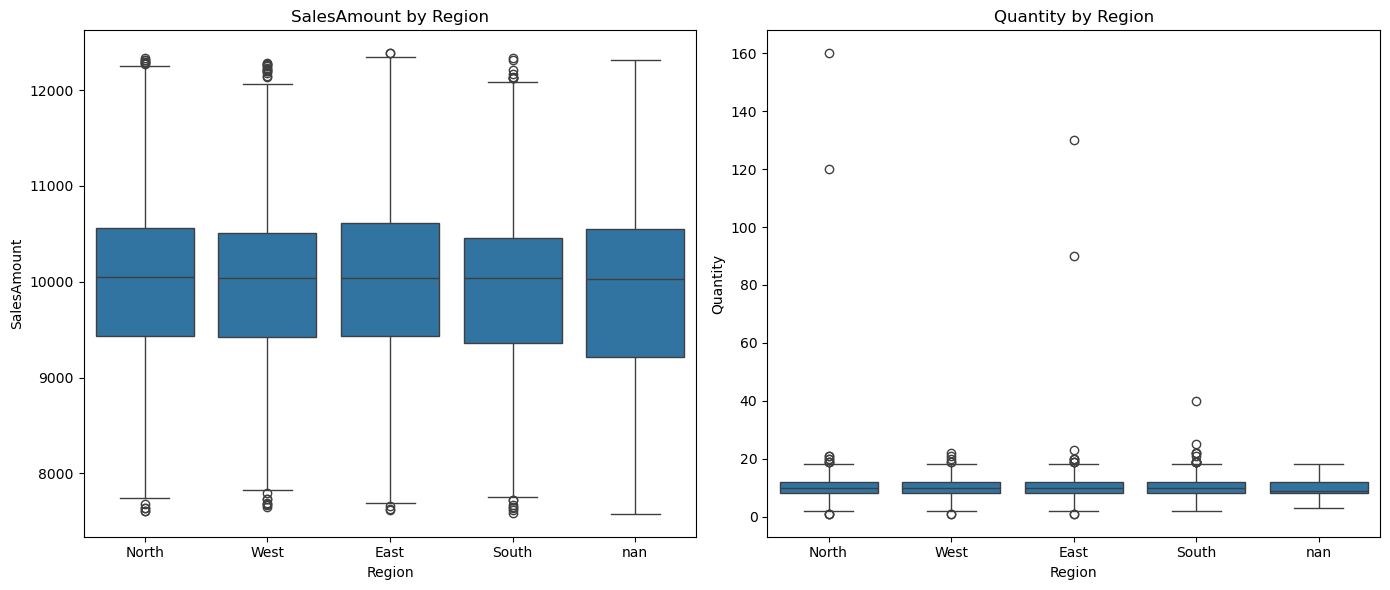

In [63]:
plt.figure(figsize=(14, 6))

# Boxplot for SalesAmount by Region
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='SalesAmount', data=data)
plt.title('SalesAmount by Region')

# Boxplot for Quantity by Region
plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='Quantity', data=data)
plt.title('Quantity by Region')

plt.tight_layout()
plt.show()

# Is there any correlation between CustomerAge, Quantity, and SalesAmount?🙄


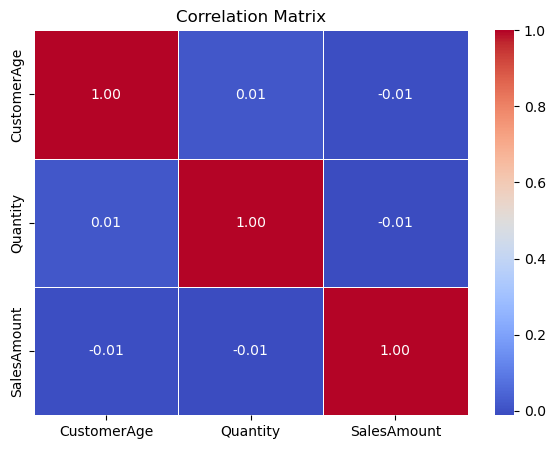

In [65]:
correlation_matrix = data[['CustomerAge', 'Quantity', 'SalesAmount']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## We can see that the realtionship between these variables is very weak, this means that no variable causes the other to change with increase or decrease✅

# What is the distribution of Quantity by Region?🙄


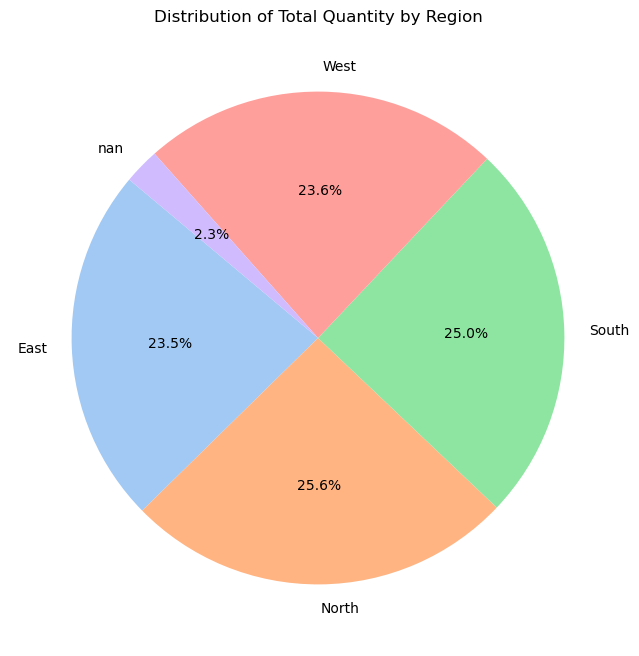

In [67]:
# Aggregate total Quantity by Region
region_quantity = data.groupby('Region')['Quantity'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_quantity, labels=region_quantity.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Total Quantity by Region')
plt.show()

## The differences between regions is not too large, but we concluded that the North has the highest quantity and the East has the lowest quantity✅

# What is the proportion of total SalesAmount by CustomerAge groups?🙄


C:\Windows\Temp\ipykernel_10108\2508355352.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = data.groupby(age_bins)['SalesAmount'].sum()


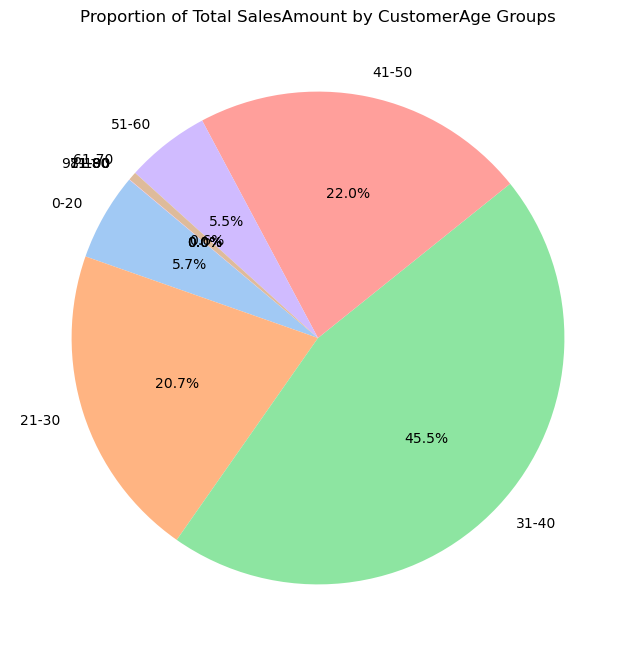

In [69]:
# Bin CustomerAge
age_bins = pd.cut(data['CustomerAge'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Aggregate total SalesAmount by age bins
age_sales = data.groupby(age_bins)['SalesAmount'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_sales, labels=age_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Proportion of Total SalesAmount by CustomerAge Groups')
plt.show()

## The plot shows that the people within the age group {31-40} has the highest sales amount✅

# What is the count of satisfaction scores?🙄


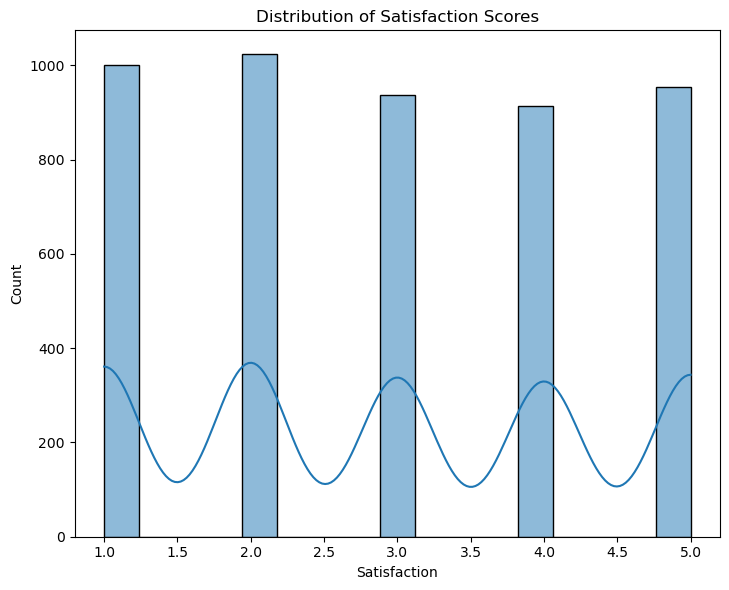

In [71]:
plt.figure(figsize=(14, 6))

# Histogram of Satisfaction
plt.subplot(1, 2, 2)
sns.histplot(data['Satisfaction'], kde=True)
plt.title('Distribution of Satisfaction Scores')

plt.tight_layout()
plt.show()

## The highest total satisfaction score is 2.0✅

# What are the key drivers of SalesAmount based on CustomerAge, Quantity, and Satisfaction?🙄


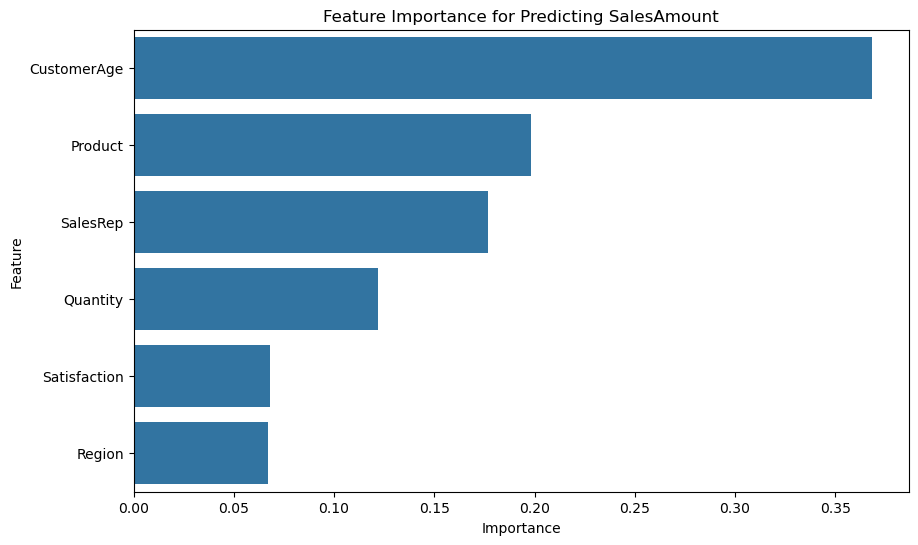

In [73]:
# Encode categorical variables
le = LabelEncoder()
data_encoded = data.copy()
data_encoded['Product'] = le.fit_transform(data_encoded['Product'])
data_encoded['Region'] = le.fit_transform(data_encoded['Region'])
data_encoded['SalesRep'] = le.fit_transform(data_encoded['SalesRep'])

# Features and target
X = data_encoded[['CustomerAge', 'Quantity', 'Satisfaction', 'Product', 'Region', 'SalesRep']]
y = data_encoded['SalesAmount']

# Train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting SalesAmount')
plt.show()

## The customer age is the most important feature in predicting sales amount✅

# How do Satisfaction scores vary across different Regions and Products?🙄


([0, 1, 2, 3, 4],
 [Text(0, 0, 'North'),
  Text(1, 0, 'West'),
  Text(2, 0, 'East'),
  Text(3, 0, 'South'),
  Text(4, 0, 'nan')])

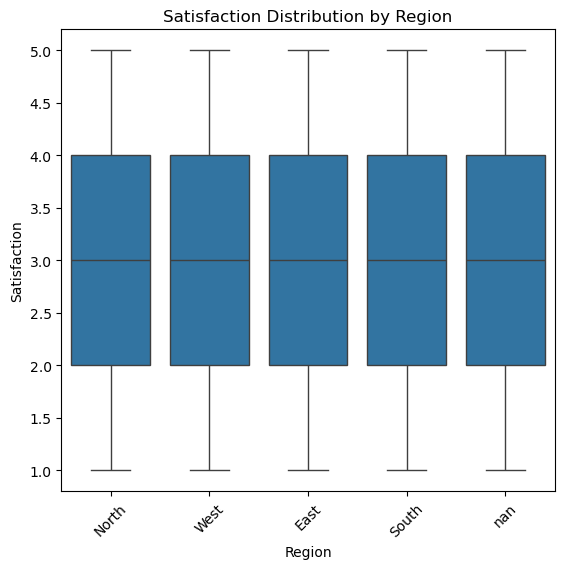

In [75]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='Satisfaction', data=data)
plt.title('Satisfaction Distribution by Region')
plt.xticks(rotation=45)

In [77]:
numeric_df = data[numeric_cols]
X = data.drop(columns='SalesAmount')
y = data['SalesAmount']

In [79]:
X = pd.get_dummies(data, drop_first=True)
X = X.astype(int)

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)

In [83]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [85]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
rf.score(X_train , y_train)

0.9999994818798323

In [89]:
rf.score(X_test , y_test)

0.9999969695727098

In [91]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [93]:
lr.score(X_train , y_train)

0.9999999015873011

In [95]:
lr.score(X_test, y_test)

0.9999998809451236

## Both the training and testing scores are very close to 1.0, suggesting that the model fits the data almost perfectly. This implies that the model is capturing the underlying patterns in the data very accurately. Given that both the training and testing scores are similarly high, it suggests that the model is not overfitting. Overfitting typically manifests as a very high training score and a significantly lower test score. Here, both scores are nearly identical, indicating that the model generalizes well to new, unseen data.

In [97]:
x = data.drop(columns='SalesAmount',axis=1)
y = data['SalesAmount']

In [99]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)
x_train

,SalesAmount,Quantity,CustomerAge,Satisfaction,Product_Product 10,Product_Product 100,Product_Product 11,Product_Product 12,Product_Product 13,Product_Product 14,...,Region_nan,FollowUp_Yes,"AgeGroup_(20, 30]","AgeGroup_(30, 40]","AgeGroup_(40, 50]","AgeGroup_(50, 60]","AgeGroup_(60, 70]","AgeGroup_(70, 80]","AgeGroup_(80, 90]","AgeGroup_(90, 100]"
4251,9225,10,35,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2763,9629,15,35,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
549,9909,13,29,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2707,9981,15,37,3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
191,9214,8,28,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,8730,9,34,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
476,9343,14,30,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3203,9204,10,37,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3909,10552,4,35,3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [101]:
numeric_columns = x_train.select_dtypes(exclude= 'object').columns
cat_columns = x_train.select_dtypes(include= 'object').columns

In [103]:
numeric_pipeline = Pipeline(steps= [('handle_missing',IterativeImputer()),
                                    ('scaling' , StandardScaler(with_mean= False))])
numeric_pipeline

Pipeline(steps=[('handle_missing', IterativeImputer()),
                ('scaling', StandardScaler(with_mean=False))])

In [109]:
cat_pipeline = Pipeline(steps = [('handle_missing',IterativeImputer()),
                                 ('handle_cat_data',OneHotEncoder()),
                                 ('scaling',StandardScaler(with_mean= False))])
cat_pipeline

Pipeline(steps=[('handle_missing', IterativeImputer()),
                ('handle_cat_data', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])

In [111]:
preprocessing = ColumnTransformer(transformers=[('numeric',numeric_pipeline,numeric_columns),
                                                ('cat',cat_pipeline ,  cat_columns)])
preprocessing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handle_missing',
                                                  IterativeImputer()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['SalesAmount', 'Quantity', 'CustomerAge', 'Satisfaction',
       'Product_Product 10', 'Product_Product 100', 'Product_Product 11',
       'Product_Product 12', 'Product_Product 13', 'Product_Product 14',
       ...
       'Region_nan', 'FollowUp...geGroup_(20, 30]', 'AgeGroup_(30, 40]',
       'AgeGroup_(40, 50]', 'AgeGroup_(50, 60]', 'AgeGroup_(60, 70]',
       'AgeGroup_(70, 80]', 'AgeGroup_(80, 90]', 'AgeGroup_(90, 100]'],
      dtype='object', length=165)),
                                ('cat',
                                 Pipeline(steps=[('handle_missing',
                                                  IterativeImputer()),
                                                 ('handle_cat_data',
                                                  OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index([], dtype='object'))])

In [113]:
final_pipeline = Pipeline(steps=[('preprocessing',preprocessing ),
                                 ('Modeling' , LinearRegression())])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('handle_missing',
                                                                   IterativeImputer()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['SalesAmount', 'Quantity', 'CustomerAge', 'Satisfaction',
       'Product_Product 10', 'Product_Product 100', 'Product_Product 11',
       'Product_Product 12', 'Product_Product 13', 'Product_Pro...
       'Region_nan', 'FollowUp_Yes', 'AgeGroup_(20, 30]', 'AgeGroup_(30, 40]',
       'AgeGroup_(40, 50]', 'AgeGroup_(50, 60]', 'AgeGroup_(60, 70]',
       'AgeGroup_(70, 80]', 'AgeGroup_(80, 90]', 'AgeGroup_(90, 100]'],
      dtype='object', length=165)),
                                                 ('cat',
                                                  Pipeline(steps=[('handle_missing',
                                                                   IterativeImputer()),
                                                                  ('handle_cat_data',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index([], dtype='object'))])),
                ('Modeling', LinearRegression())])

In [115]:
final_pipeline.fit(x_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('handle_missing',
                                                                   IterativeImputer()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['SalesAmount', 'Quantity', 'CustomerAge', 'Satisfaction',
       'Product_Product 10', 'Product_Product 100', 'Product_Product 11',
       'Product_Product 12', 'Product_Product 13', 'Product_Pro...
       'Region_nan', 'FollowUp_Yes', 'AgeGroup_(20, 30]', 'AgeGroup_(30, 40]',
       'AgeGroup_(40, 50]', 'AgeGroup_(50, 60]', 'AgeGroup_(60, 70]',
       'AgeGroup_(70, 80]', 'AgeGroup_(80, 90]', 'AgeGroup_(90, 100]'],
      dtype='object', length=165)),
                                                 ('cat',
                                                  Pipeline(steps=[('handle_missing',
                                                                   IterativeImputer()),
                                                                  ('handle_cat_data',
                                                                   OneHotEncoder()),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index([], dtype='object'))])),
                ('Modeling', LinearRegression())])

In [117]:
final_pipeline.score(x_train , y_train)

0.9999999015873011

In [119]:
final_pipeline.score(x_test , y_test)

0.9999998809451236

In [121]:
%%writefile app.py

def predict_sales_amount(Product, SalesRep, Region, Quantity, CustomerAge, Satisfaction, FollowUp):
    prediction = regressor.predict(pd.DataFrame({
        'Product': [Product],
        'SalesRep': [SalesRep],
        'Region': [Region],
        'Quantity': [Quantity],
        'CustomerAge': [CustomerAge],
        'Satisfaction': [Satisfaction],
        'FollowUp': [FollowUp]
    }))
    return prediction[0]

def main():
    st.title('Sales Amount Prediction')

    # Dummy data for selectbox options
    data = {
        'Product': ['Product1', 'Product2', 'Product3'],
        'Region': ['Region1', 'Region2', 'Region3'],
        'Satisfaction': ['Low', 'Medium', 'High']
    }

    Product = st.selectbox("Product", data['Product'])
    SalesRep = st.text_input('SalesRep', 'Please enter the SalesRep')
    Region = st.selectbox("Region", data['Region'])
    Quantity = st.text_input('Quantity', 'Please enter the quantity')
    Satisfaction = st.selectbox("Satisfaction", data['Satisfaction'])
    CustomerAge = st.text_input('CustomerAge', 'Please enter the age')
    FollowUp = st.selectbox('FollowUp', ['Yes', 'No'])

    result = ""
    if st.button('Predict'):
        result = predict_sales_amount(Product, SalesRep, Region, Quantity, CustomerAge, Satisfaction, FollowUp)
        st.success(f'The predicted sales amount is {result}')

if __name__ == '__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py